In [1]:
import matplotlib.pyplot as plt
import numpy as np 

Text(0, 0.5, 'amplitud')

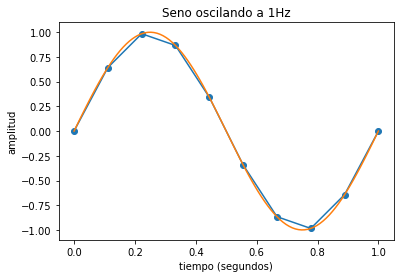

In [16]:
Fm = 10
F = 1
t = np.linspace(0,1,Fm)
# https://en.wikipedia.org/wiki/Sine_wave
y = np.sin(2*np.pi*F*t)

t2 = np.linspace(0,1,100)
y2 = np.sin(2*np.pi*F*t2)

plt.title(f"Seno oscilando a {F}Hz")
plt.plot(t,y,'o-')
plt.plot(t2,y2,'-')
plt.xlabel("tiempo (segundos)")
plt.ylabel("amplitud")

Text(0.5, 0, 'tiempo (seg)')

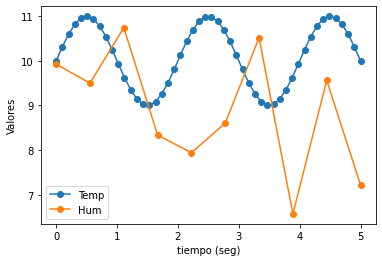

In [24]:
# Sensor de humedad: Serie temporal de datos seno a Foscilacion=0.5Hz
# Sensor de temperatura: Serie temporal de datos muestreados a 2Hz

# Sensor temperatura
t_Temp = np.linspace(0,5,50)
#y_Temp = np.random.random(len(t_Temp))
y_Temp = np.sin(2*np.pi*0.5*t_Temp) + 10

# Sensor humedad
t_Hum = np.linspace(0,5,10)
y_Hum = np.random.random(len(t_Hum)) * 5 + 6

plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Hum,y_Hum,'o-')
plt.legend(["Temp","Hum"])
plt.ylabel("Valores")
plt.xlabel("tiempo (seg)")

In [25]:
print(y_Temp.shape)
print(y_Hum.shape)

(50,)
(10,)


In [27]:
print(y_Temp)
print(y_Hum)

y_Temp-y_Hum

[10.         10.31510822 10.59811053 10.82017225 10.95866785 10.99948622
 10.93846842 10.78183148 10.5455349  10.25365458  9.93592978  9.624733
  9.3517716   9.14485724  9.02507209  9.00462089  9.08558738  9.259722
  9.50928245  9.80884137 10.12787716 10.43388374 10.69568255 10.88659931
 10.98718178 10.98718178 10.88659931 10.69568255 10.43388374 10.12787716
  9.80884137  9.50928245  9.259722    9.08558738  9.00462089  9.02507209
  9.14485724  9.3517716   9.624733    9.93592978 10.25365458 10.5455349
 10.78183148 10.93846842 10.99948622 10.95866785 10.82017225 10.59811053
 10.31510822 10.        ]
[ 9.92613668  9.49947888 10.74356921  8.33547059  7.94102959  8.60725043
 10.51797679  6.56975794  9.56338096  7.21779265]


ValueError: operands could not be broadcast together with shapes (50,) (10,) 

In [45]:
from scipy.interpolate import interp1d

fn = interp1d(t_Hum, y_Hum, kind="cubic")

y_Hum_interp = fn(t_Temp)
print(y_Hum_interp.shape)


(50,)


Text(0.5, 0, 'tiempo (seg)')

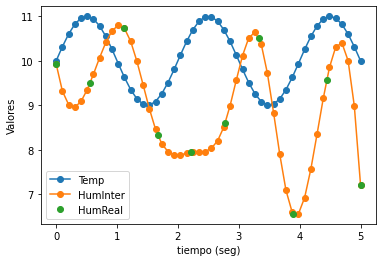

In [46]:
plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Temp,y_Hum_interp,'o-')
plt.plot(t_Hum,y_Hum,'o')
plt.legend(["Temp","HumInter","HumReal"])
plt.ylabel("Valores")
plt.xlabel("tiempo (seg)")

Text(0.5, 0, 'tiempo (seg)')

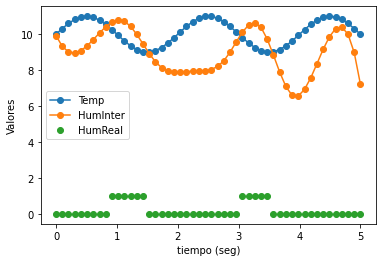

In [47]:
diff = (y_Hum_interp - y_Temp) > 0

plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Temp,y_Hum_interp,'o-')
plt.plot(t_Temp,diff,'o')
plt.legend(["Temp","HumInter","HumReal"])
plt.ylabel("Valores")
plt.xlabel("tiempo (seg)")

Text(0.5, 0, 'tiempo (seg)')

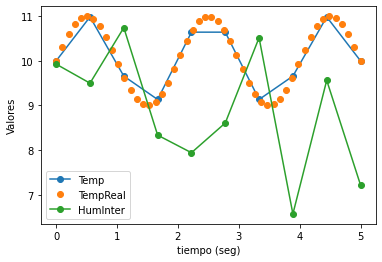

In [52]:
fn = interp1d(t_Temp, y_Temp, kind="cubic")

y_Temp_interp = fn(t_Hum)

plt.plot(t_Hum,y_Temp_interp ,'o-')
plt.plot(t_Temp,y_Temp,'o')

plt.plot(t_Hum,y_Hum,'o-')
plt.legend(["Temp","TempReal","HumInter"])
plt.ylabel("Valores")
plt.xlabel("tiempo (seg)")